In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["axes.grid"] = False
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.color"] = "black"

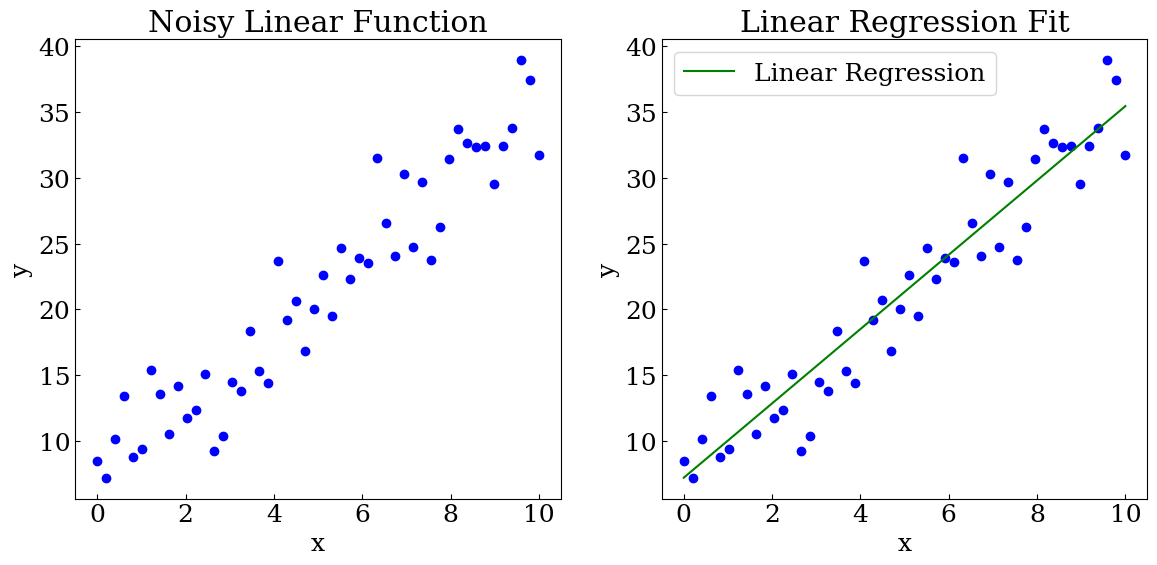

In [3]:
# データ生成
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 7 + np.random.normal(0, 3, size=x.shape)  # 一次関数にノイズを追加

# 線形回帰 (行列計算)
X = np.vstack([x, np.ones_like(x)]).T 
theta = np.linalg.inv(X.T @ X) @ X.T @ y  # 正規方程式を解く
y_pred = X @ theta  # 予測値

# プロット
plt.figure(figsize=(12, 6))

# ノイズ付き一次関数
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.title('Noisy Linear Function')
plt.xlabel('x')
plt.ylabel('y')

# 線形回帰結果
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='green', label='Linear Regression')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()


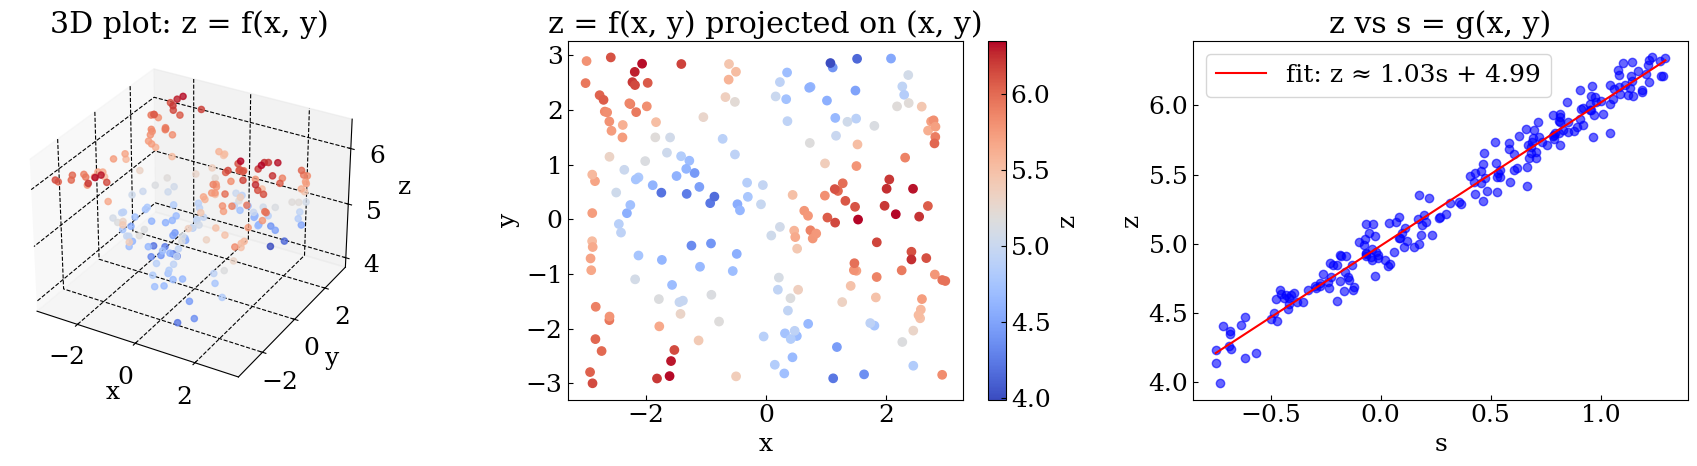

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
np.random.seed(1)
x = np.random.uniform(-3, 3, 200)
y = np.random.uniform(-3, 3, 200)

# Complex feature s = g(x, y)
s = np.sin(x) * np.cos(y) + 0.1 * x**2 

# z = f(x, y) = s + noise
z = s + 5 + np.random.normal(0, 0.1, size=x.shape)

# Fit
a, b = np.polyfit(s, z, 1)
z_fit = a * s + b

# Plot
fig = plt.figure(figsize=(18, 5))

# 1. z on (x, y) plane
ax1 = fig.add_subplot(131)
sc = ax1.scatter(x, y, c=z, cmap='coolwarm')
ax1.set_title('z = f(x, y) projected on (x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(sc, ax=ax1, label='z')

# 2. (x, y, z) 3D surface
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x, y, z, c=z, cmap='coolwarm', alpha=0.8)
ax2.set_title('3D plot: z = f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# 3. z vs s
ax3 = fig.add_subplot(133)
ax3.scatter(s, z, color='blue', alpha=0.6)
ax3.plot(np.sort(s), z_fit[np.argsort(s)], color='red', label=f'fit: z ≈ {a:.2f}s + {b:.2f}')
ax3.set_title('z vs s = g(x, y)')
ax3.set_xlabel('s')
ax3.set_ylabel('z')
ax3.legend()

plt.tight_layout()
plt.show()
